## Lab | Cross Validation

1.Apply SMOTE for upsampling the data:
-Use logistic regression to fit the model and compute the accuracy of the model.
-Use decision tree classifier to fit the model and compute the accuracy of the model.
-Compare the accuracies of the two models.

2.Apply TomekLinks for downsampling

-It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
-Use logistic regression to fit the model and compute the accuracy of the model.
-Use decision tree classifier to fit the model and compute the accuracy of the model.
-Compare the accuracies of the two models.
-You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
#importing the dataset

data=pd.read_csv('Customer-Churn.csv')
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
#Data exploration

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
#Total charges is not an object

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [6]:
#checking the columns header's

list(data.columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
#Checking for null values

data.isna().sum()/len(data)

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [8]:
data['TotalCharges'].isna().sum()

11

In [9]:
data['TotalCharges'].value_counts(dropna=False)

NaN        11
20.20      11
19.75       9
19.90       8
19.65       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
most=data['TotalCharges'].value_counts(sort=True).reset_index().iloc[0,0]
data['TotalCharges']=data['TotalCharges'].fillna(most)

In [11]:
data['TotalCharges'].value_counts(dropna=False)

20.20      22
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [12]:
data.isna().sum()/len(data) #No more null values, however checking empty spaces for example

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [13]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [14]:
def filter_nulls(df, perc=.25):
    null_perc=pd.DataFrame(df.isna().sum()/len(df)).reset_index() #Column names in the dataset
    null_perc.columns=['column_name','column_perc']
    columns_above_perc=null_perc[null_perc['column_perc']>perc]
    drop_columns=list(columns_above_perc['column_name'])
    return drop_columns

In [15]:
drop_columns=filter_nulls(data)

drop_columns #this a the columns with 0.25 of null values

[]

In [16]:
# There are no more nans in the dataset

In [24]:
# Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges
# Scale the features either by using normalizer or a standard scaler. 

X = data['Churn']
X

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [25]:
numerical = data[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [26]:
numerical.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.765853
std,0.368612,24.559481,30.090047,2266.762876
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
#Scale features from the numerical dataframe, and first adding the libraries needed and then the scaling itself

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(numerical)
numerical_s=scaler.transform(numerical)
numerical_s #it returns a numpy array, we have to turn it 

array([[-0.43991649, -1.27744458, -1.16032292, -0.99263828],
       [-0.43991649,  0.06632742, -0.25962894, -0.17218103],
       [-0.43991649, -1.23672422, -0.36266036, -0.95809317],
       ...,
       [-0.43991649, -0.87024095, -1.1686319 , -0.85295782],
       [ 2.27315869, -1.15528349,  0.32033821, -0.8705392 ],
       [-0.43991649,  1.36937906,  1.35896134,  2.0139108 ]])

In [28]:
#create a dataset, because of the numpy array in the above operation

numerical_s = pd.DataFrame(numerical_s)
numerical_s.columns = numerical_s.columns.astype(str)
numerical_s.rename(columns={'0':'SeniorCitizen', '1':'tenure', '2':'MonthlyCharges', '3':'TotalCharges'}, inplace=True)
numerical_s

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.992638
1,-0.439916,0.066327,-0.259629,-0.172181
2,-0.439916,-1.236724,-0.362660,-0.958093
3,-0.439916,0.514251,-0.746535,-0.193689
4,-0.439916,-1.236724,0.197365,-0.938901
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.127621
7039,-0.439916,1.613701,1.277533,2.242623
7040,-0.439916,-0.870241,-1.168632,-0.852958
7041,2.273159,-1.155283,0.320338,-0.870539


In [29]:
# train and test slipt

y=data['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [30]:
X=numerical_s
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.992638
1,-0.439916,0.066327,-0.259629,-0.172181
2,-0.439916,-1.236724,-0.362660,-0.958093
3,-0.439916,0.514251,-0.746535,-0.193689
4,-0.439916,-1.236724,0.197365,-0.938901
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.127621
7039,-0.439916,1.613701,1.277533,2.242623
7040,-0.439916,-0.870241,-1.168632,-0.852958
7041,2.273159,-1.155283,0.320338,-0.870539


In [31]:
# loading the train test split library 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Logistics regression model (loading library in first place)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
predictions = clf.predict(X_test)

In [33]:
clf

LogisticRegression(max_iter=500, random_state=42)

In [34]:
predictions # numpy array

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [35]:
#check accuracy score (first load library needed), confusion matrix and classification report

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,y_test)) 

Confusion matrix
[[959 196]
 [ 77 177]]
-------------------------------------------------------
Accuracy score
0.8062455642299503
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.93      0.83      0.88      1155
         Yes       0.47      0.70      0.56       254

    accuracy                           0.81      1409
   macro avg       0.70      0.76      0.72      1409
weighted avg       0.84      0.81      0.82      1409



The accuracy of your model is:  0.8062455642299503


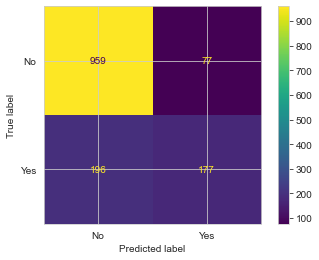

In [36]:
#plot confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
print("The accuracy of your model is: ", accuracy_score(y_test, predictions))

In [37]:
#Now, dealing with the imbalanced data

#downsampling
datachurn=pd.concat([X,y],axis=1)

category_yes = datachurn[datachurn['Churn'] == 'Yes']
category_no = datachurn[datachurn['Churn'] == 'No']

category_no = category_no.sample(len(category_yes))
print(category_yes.shape)
print(category_no.shape)

data = pd.concat([category_yes, category_no], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

(1869, 5)
(1869, 5)


No     1869
Yes    1869
Name: Churn, dtype: int64

In [38]:
#train test split to check if there's an improvement WITH DOWNSAMPLING

XD = data.drop(['Churn'], axis = 1)
yD = data['Churn']


XD_train, XD_test, yD_train, yD_test = train_test_split(XD, yD, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=42, max_iter=500).fit(XD_train, yD_train)
predictions = clf.predict(XD_test)

In [39]:
#check accuracy score (first load library needed), confusion matrix and classification report

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(predictions,yD_test))
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,yD_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,yD_test)) 

Confusion matrix
[[273  88]
 [ 91 296]]
-------------------------------------------------------
Accuracy score
0.7606951871657754
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.75      0.76      0.75       361
         Yes       0.77      0.76      0.77       387

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



The accuracy of your model is:  0.7606951871657754


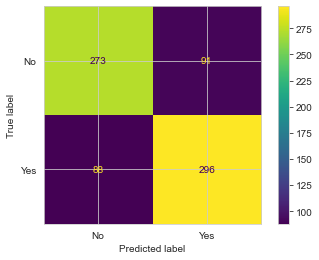

In [40]:
#plot confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, XD_test, yD_test)
print("The accuracy of your model is: ", accuracy_score(yD_test, predictions))

In [41]:
#The accuracy of the model decrease to 0.70, however the predicition of 'Yes', improved quite a lot, 
#balacing the dataset

In [42]:
#upsampling

category_yes = datachurn[datachurn['Churn'] == 'Yes']
category_no = datachurn[datachurn['Churn'] == 'No']

category_yes = category_yes.sample(len(category_no),replace=True)
print(category_yes.shape)
print(category_no.shape)

data = pd.concat([category_yes, category_no], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

(5174, 5)
(5174, 5)


No     5174
Yes    5174
Name: Churn, dtype: int64

In [43]:
#train test split to check if there's an improvement WITH UPSAMPLING

XU = data.drop(['Churn'], axis = 1)
yU = data['Churn']


XU_train, XU_test, yU_train, yU_test = train_test_split(XU, yU, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=42, max_iter=500).fit(XU_train, yU_train)
predictions = clf.predict(XU_test)

In [44]:
#check accuracy score (first load library needed), confusion matrix and classification report

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(predictions,yU_test))
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,yU_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,yU_test)) 

Confusion matrix
[[762 258]
 [288 762]]
-------------------------------------------------------
Accuracy score
0.736231884057971
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.73      0.75      0.74      1020
         Yes       0.75      0.73      0.74      1050

    accuracy                           0.74      2070
   macro avg       0.74      0.74      0.74      2070
weighted avg       0.74      0.74      0.74      2070



The accuracy of your model is:  0.736231884057971


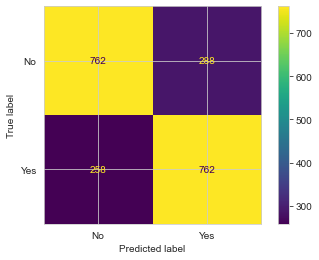

In [45]:
#plot confusion matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, XU_test, yU_test)
print("The accuracy of your model is: ", accuracy_score(yU_test, predictions))

In [46]:
#The accuracy of the model decrease to 0.72, prediction of 'No' improved in comparison with the downsampling.
#The model that was tested has a better performance with upsampling

## Start of cross validation lab

In [48]:
#SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(X, y)
y_sm = y_sm.to_numpy()
y_sm = pd.Series(data=y_sm.flatten())
y_sm.value_counts()

No     5174
Yes    5174
dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=100)

classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train.values.ravel())
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The accuracy of the logistic_regression model is: 0.74 
The kappa of the logistic regression model is: 0.48 


In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))

The accuracy of the model is: 0.76


In [52]:
#TomekLinks

from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)

unique, counts = np.unique(y_tl, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 4665]
 ['Yes' 1869]]


The accuracy of the logistic_regression model is: 0.79 
The kappa of the logistic regression model is: 0.44 
              precision    recall  f1-score   support

         Yes       0.66      0.51      0.58       360
          No       0.83      0.90      0.86       947

    accuracy                           0.79      1307
   macro avg       0.75      0.71      0.72      1307
weighted avg       0.78      0.79      0.78      1307



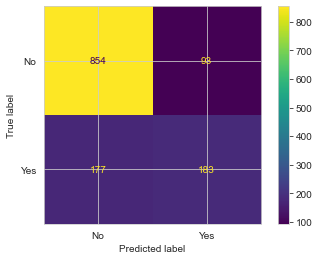

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr', max_iter=10000).fit(X_train, y_train)

y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

from sklearn.metrics import cohen_kappa_score
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred, labels=["Yes","No"]))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()

In [54]:
#It's possible to conclude, that TomekLinks has the highest accuracy (between SMOTE and Tomwklinks)